In [2]:
function poly1(coeffs::Vector{T}, x::S) where {T <: Number, S <: Number}
  local sum = zero(T)
  function pow(x::T,n::Int) where T <: Number
    local prod = one(T)
    for j=1:n
      prod *=x
    end
    prod
  end
  for n=1:length(coeffs)
    sum += coeffs[n]*pow(x,n-1)
  end
  sum
end

poly1 (generic function with 1 method)

In [4]:
using BenchmarkTools, CairoMakie, Random, LsqFit, FFTW
CairoMakie.activate!()
# Makie.inline(true)
Random.seed!(132)

TaskLocalRNG()

In [5]:
time = zeros(351)
r = 1:50:351
for i=r
  coeffs = rand(i+1)
  time[i] = @belapsed poly1($coeffs,1/3)
end

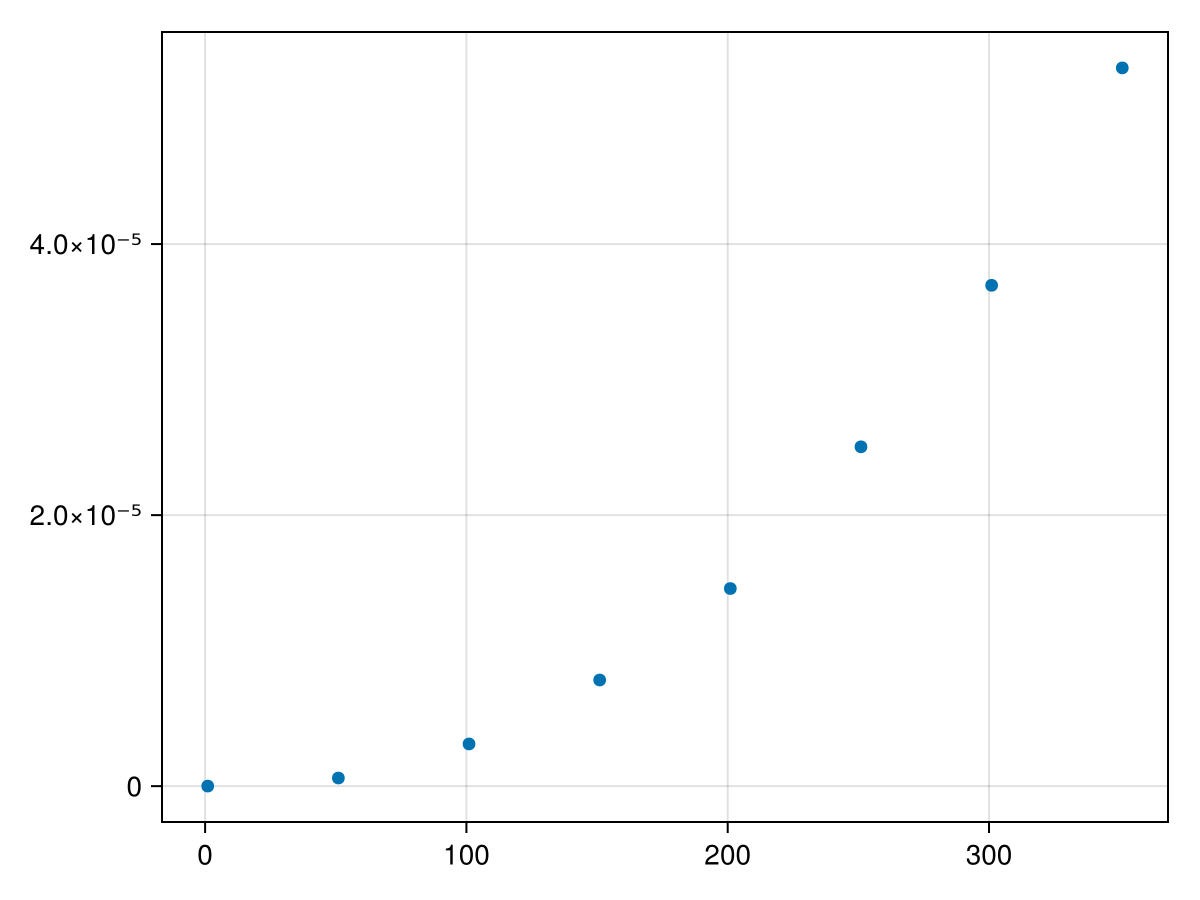

In [6]:
fig, ax = scatter(r,time[r])

In [7]:
save("../assets/plots/algorithm-analysis/plot01.png", fig)

CairoMakie.Screen{IMAGE}


In [8]:
fit = curve_fit((t,p) -> p[1].+p[2].*t.+p[3].*t.^2, r, time[r], [1e-8,1e-8,1e-8])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([4.523941002743314e-7, -2.884056992844406e-8, 5.048760322417624e-10], [4.185584063781291e-7, -3.057259322270525e-7, -4.247630576003006e-7, -2.24353547776299e-7, 4.6993612325651313e-7, -1.9894044501857287e-8, 5.556559489485773e-7, -4.6941389639217426e-7], [1.0 1.0 1.0; 1.0 51.0 2600.9999999999995; … ; 0.9999999999999999 301.0 90601.0; 1.0000000000000004 351.0 123201.0], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [9]:
fit.param

3-element Vector{Float64}:
  4.523941002743314e-7
 -2.884056992844406e-8
  5.048760322417624e-10

In [10]:
confidence_interval(fit,0.05)

3-element Vector{Tuple{Float64, Float64}}:
 (-6.407475166100645e-7, 1.5455357171587273e-6)
 (-4.335370476106983e-8, -1.4327435095818294e-8)
 (4.65214959675243e-10, 5.445371048082817e-10)

In [11]:
model2(t,p) = p[1].*t.^2

model2 (generic function with 1 method)

In [12]:
fit2 = curve_fit(model2, r, time[r], [1e-8])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([4.1381414838504646e-10], [-5.086185851614953e-9, 4.7589707393794514e-7, 1.1068181276758585e-6, 1.6018763973274431e-6, 2.1355054089042596e-6, 1.029705162406311e-6, 5.339756578335935e-7, -2.0176831048138893e-6], [1.0; 2600.9999999999995; … ; 90601.0; 123200.99999999999;;], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

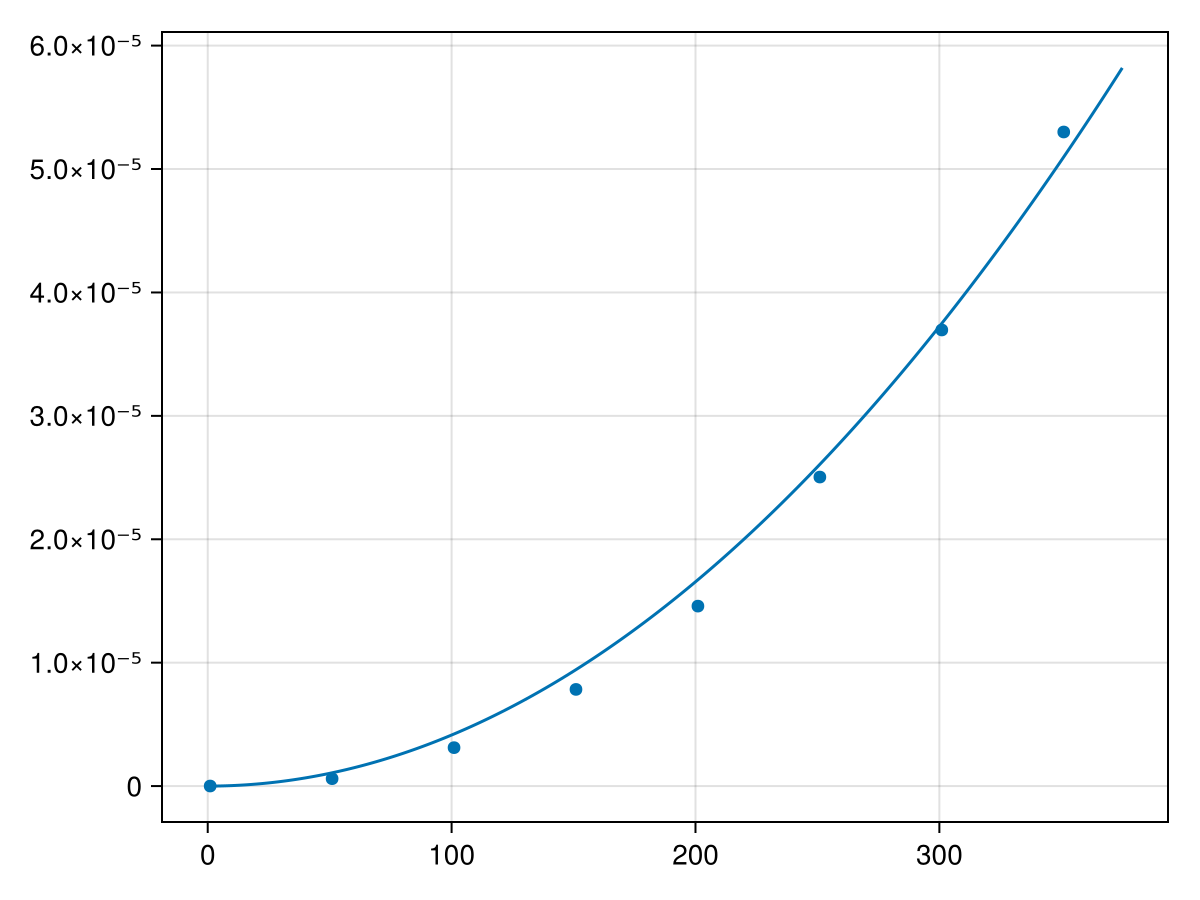

In [13]:
lines!(ax, 0:375,t->fit2.param[1]*t^2)
fig

In [14]:
save("../assets/plots/algorithm-analysis/plot02.png", fig)

CairoMakie.Screen{IMAGE}


In [15]:
function horner(coeffs::Vector{T},x::S) where {T <: Number, S <: Number}
  local result = coeffs[end]
  for i=length(coeffs)-1:-1:1
    result = x*result+coeffs[i]
  end
  result
end

horner (generic function with 1 method)

In [16]:
htime = zeros(351)
r = 1:50:351
for i=r
  coeffs = rand(i)
  htime[i] = @belapsed horner($coeffs,10/3)
end


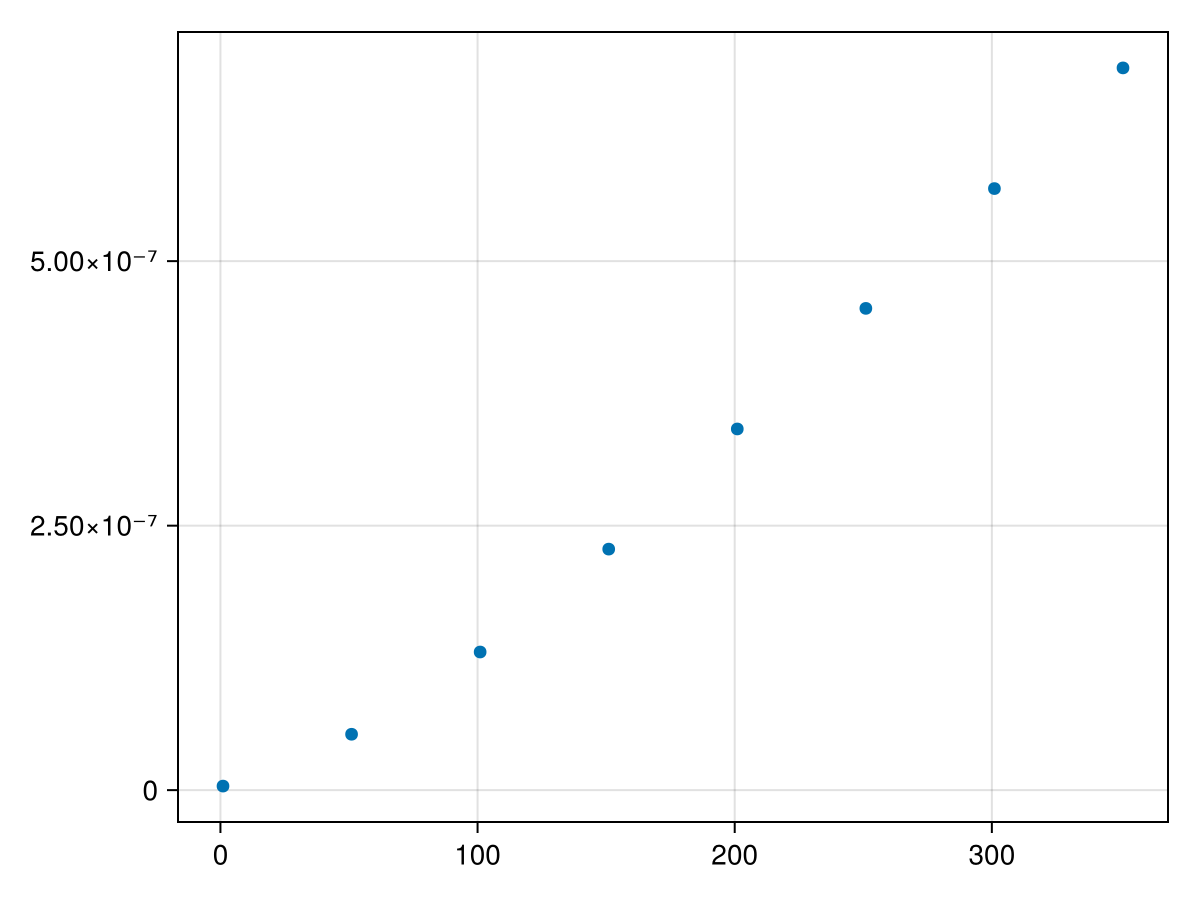

In [17]:
fig, ax = scatter(r, htime[r])

In [18]:
save("../assets/plots/algorithm-analysis/plot03.png", fig)

CairoMakie.Screen{IMAGE}


In [19]:
fit3 = curve_fit((t,p) -> p[1].*t, r, htime[r], [1e-8])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([1.8252818762510043e-9], [-2.007718123748996e-9, 4.026686047581949e-8, 5.3786085582891645e-8, 4.779859779666033e-8, 2.5485343762396614e-8, 2.7751925633675474e-9, -1.9204285683230268e-8, -4.1994935608082864e-8], [1.0; 51.0; … ; 301.0; 351.0;;], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [20]:
fit3.param

1-element Vector{Float64}:
 1.8252818762510043e-9

In [21]:
confidence_interval(fit3)

1-element Vector{Tuple{Float64, Float64}}:
 (1.6779102191323527e-9, 1.972653533369656e-9)

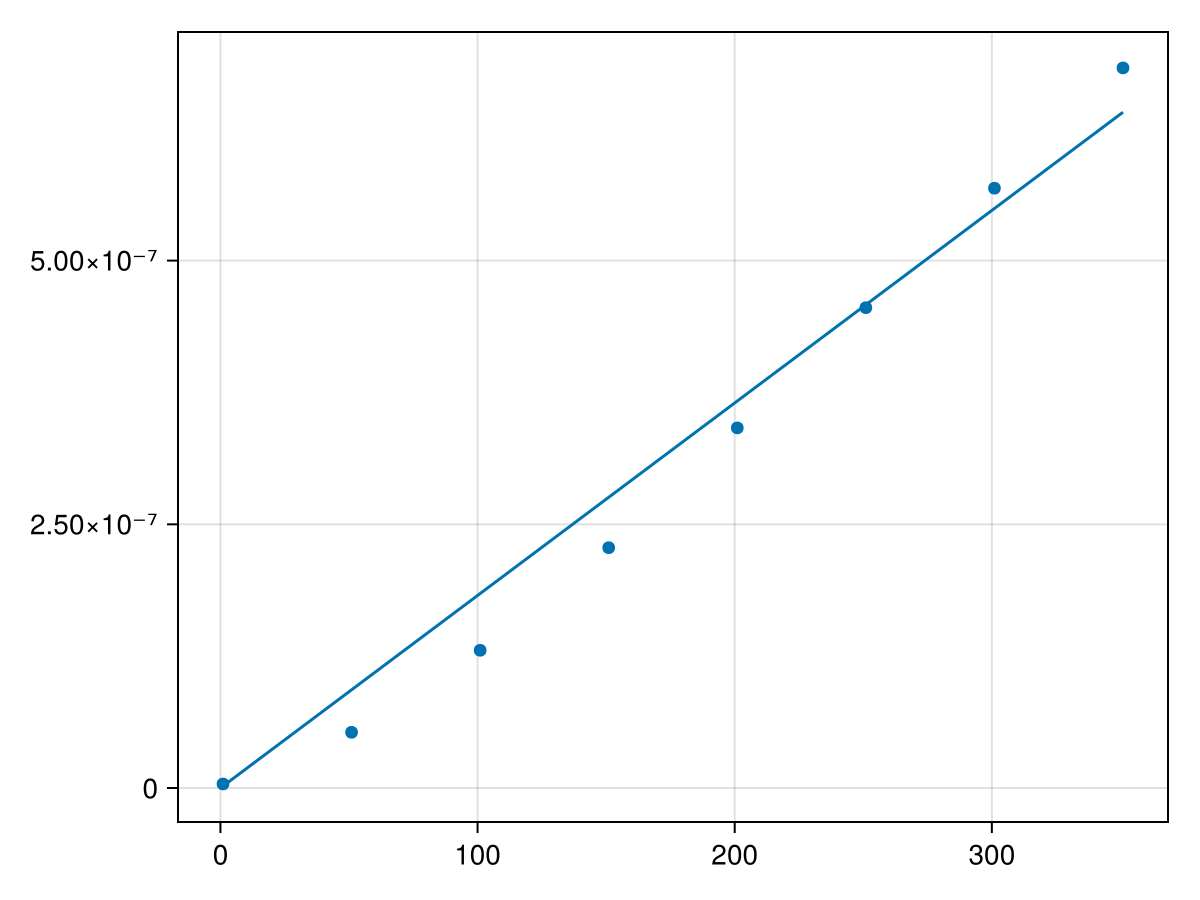

In [22]:
lines!(ax,1:351,t->fit3.param[1]*t)
fig

In [23]:
save("../assets/plots/algorithm-analysis/plot04.png", fig)

CairoMakie.Screen{IMAGE}


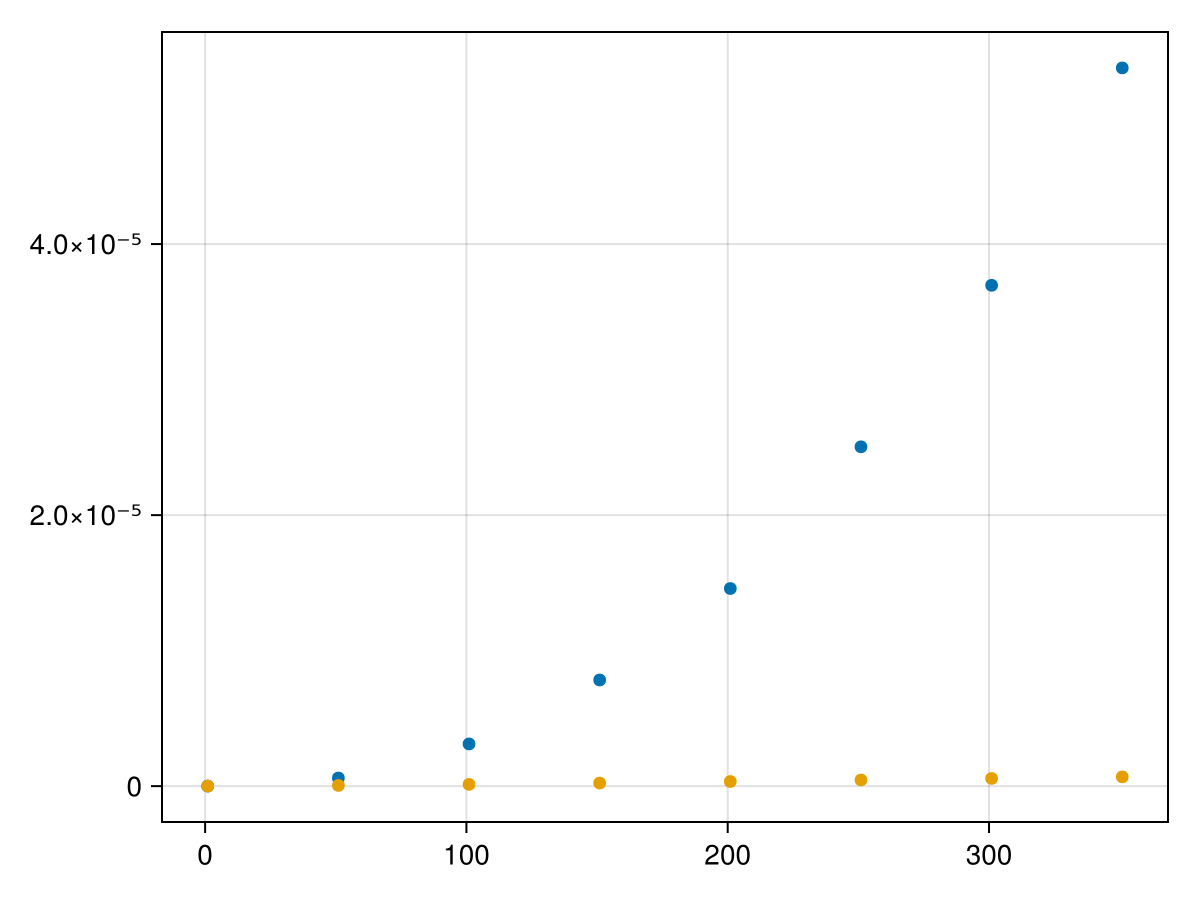

In [24]:
fig, ax =  scatter(r, time[r])
scatter!(ax, r, htime[r])
fig


In [25]:
save("../assets/plots/algorithm-analysis/plot05.png", fig)

CairoMakie.Screen{IMAGE}


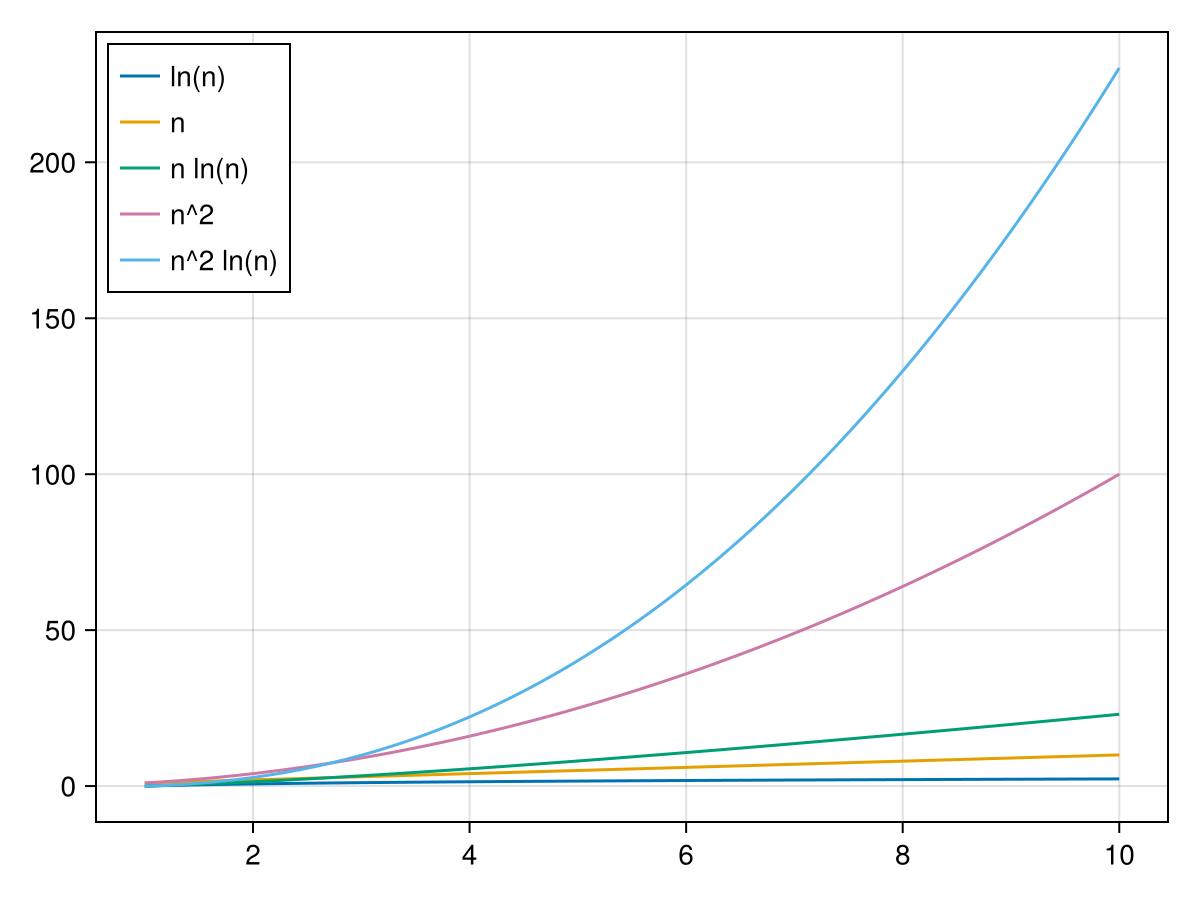

In [26]:
fig = Figure()
ax = Axis(fig[1,1])
pl1 = lines!(ax, 1:0.05:10,x->log(x))
pl2 = lines!(ax,1:0.05:10,x->x)
pl3 = lines!(ax,1:0.05:10,x->x*log(x))
pl4 = lines!(ax,1:0.05:10,x->x^2)
pl5 = lines!(ax,1:0.05:10,x->x^2*log(x))
axislegend(ax,[pl1,pl2,pl3,pl4,pl5],["ln(n)","n","n ln(n)","n^2","n^2 ln(n)"], position = :lt)
fig

In [27]:
save("../assets/plots/algorithm-analysis/plot06.png", fig)

CairoMakie.Screen{IMAGE}


In [28]:
times3 = Float64[]
sizes3 = [2^n for n=10:18]
for size in sizes3
  x=rand(size)
  t = @belapsed fft($x)
  push!(times3,t)
end

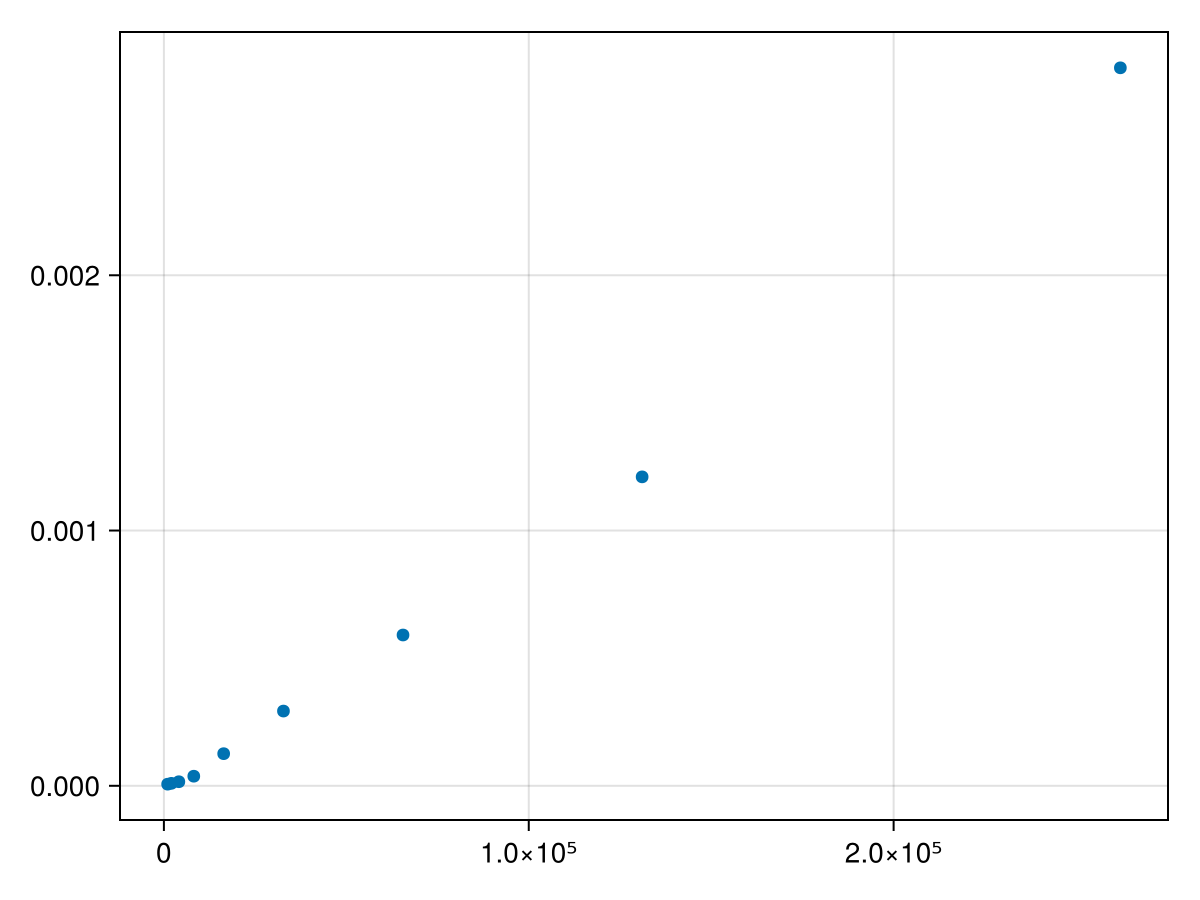

In [29]:
scatter(sizes3, times3)

In [30]:
save("../assets/plots/algorithm-analysis/fftw.png", fig)

CairoMakie.Screen{IMAGE}


In [32]:
fit_fft = curve_fit((t,p) -> p[1].*t.*log.(t)+p[2].*t.^2,sizes3, times3, [1e-4,1e-4])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([7.435162274304846e-10, 5.459257616741628e-15], [-1.1169259036266306e-6, 1.8830670157479302e-6, 9.422869463557174e-6, 1.762580093547269e-5, -6.196909535395045e-6, -3.365838357569941e-5, -2.694306293013146e-5, 3.184961550661597e-5, -5.7479545556332785e-6], [7097.827128933841 1.048576e6; 15615.219683654446 4.194304e6; … ; 1.5444871832560035e6 1.7179869184e10; 3.270678741012713e6 6.8719476736e10], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [33]:
confidence_interval(fit_fft)

2-element Vector{Tuple{Float64, Float64}}:
 (6.879894218252294e-10, 7.990430330357398e-10)
 (2.557195884568105e-15, 8.361319348915151e-15)

In [34]:
fit_fft.param

2-element Vector{Float64}:
 7.435162274304846e-10
 5.459257616741628e-15

In [35]:
fit_fft2 = curve_fit((t,p) -> p[1]*t.*log.(t), sizes3, times3, [1e-4])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([8.446244345364724e-10], [-4.0500177478662194e-7, 3.438996095469432e-6, 1.2775991481024213e-5, 2.472298154221913e-5, 8.412960244779646e-6, -5.073085189757833e-6, 2.309681826184989e-5, 9.422061380643092e-5, -5.02128178216754e-5], [7097.827128933841; 15615.219683654446; … ; 1.5444871832560035e6; 3.270678741012714e6;;], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [36]:
confidence_interval(fit_fft2)

1-element Vector{Tuple{Float64, Float64}}:
 (8.197426904649365e-10, 8.695061786080083e-10)

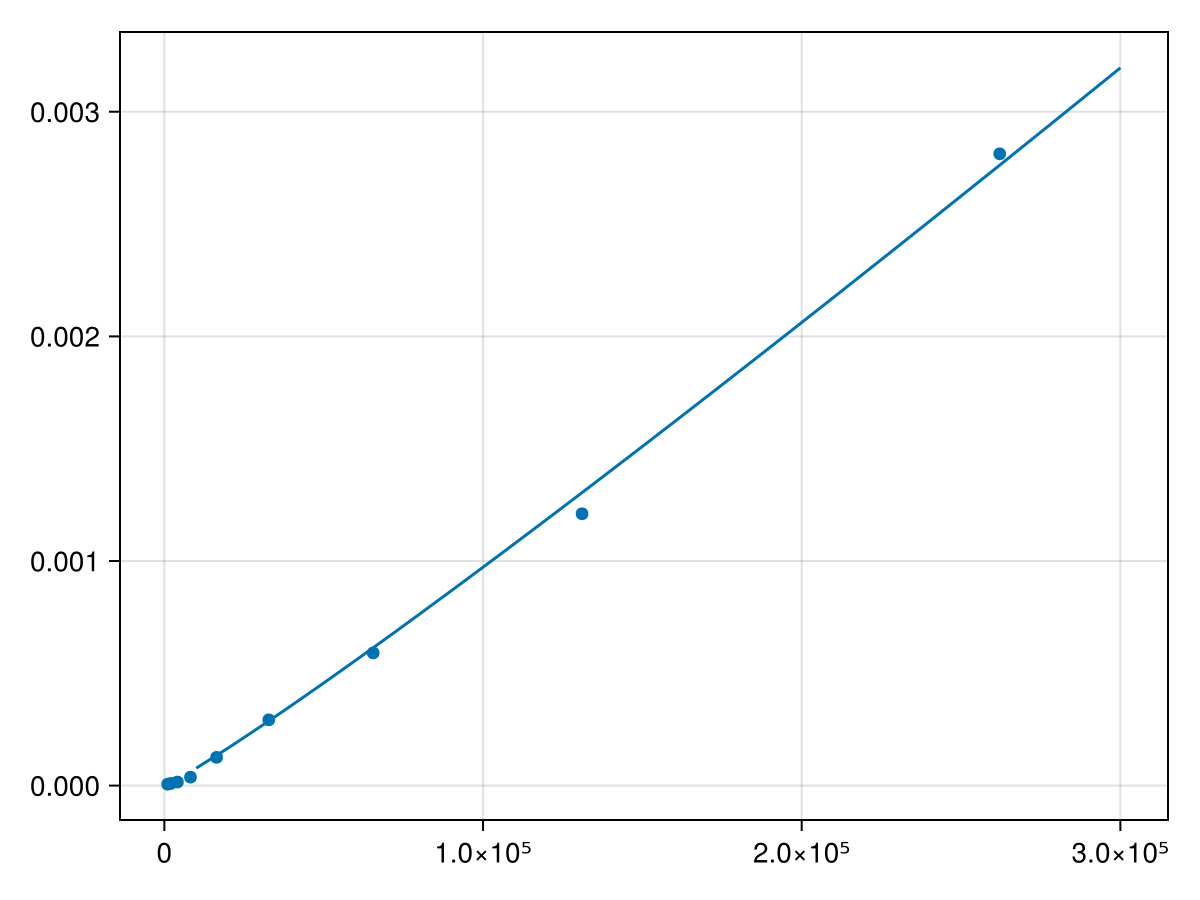

In [41]:
fig, ax = scatter(sizes3, times3)
lines!(ax, 0:10^4:3*10^5, x->fit_fft2.param[1]*x*log(x))
fig


In [42]:
save("../assets/plots/algorithm-analysis/best-fit-fft.png", fig)

CairoMakie.Screen{IMAGE}
